In [20]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics  
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
columns = ['buying','maint','doors','person','lug_boots','safety','class']

In [22]:
df = pd.read_csv('car_evaluation.csv',names=columns)
df.head()

,buying,maint,doors,person,lug_boots,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   buying     1728 non-null   object
 1   maint      1728 non-null   object
 2   doors      1728 non-null   object
 3   person     1728 non-null   object
 4   lug_boots  1728 non-null   object
 5   safety     1728 non-null   object
 6   class      1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [24]:
df.isna().apply(pd.value_counts)

,buying,maint,doors,person,lug_boots,safety,class
False,1728,1728,1728,1728,1728,1728,1728


In [25]:
    df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

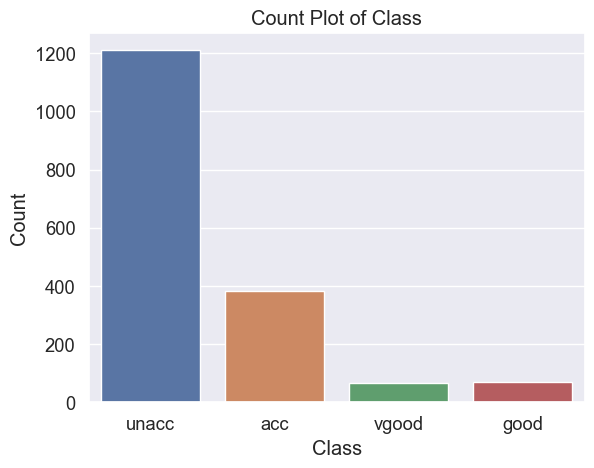

In [26]:
sns.countplot(x='class', data=df)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count Plot of Class')
plt.show()


In [27]:
df['class'] = df['class'].replace(['vgood', 'good'], 'acc')

df['class'].value_counts()

unacc    1210
acc       518
Name: class, dtype: int64

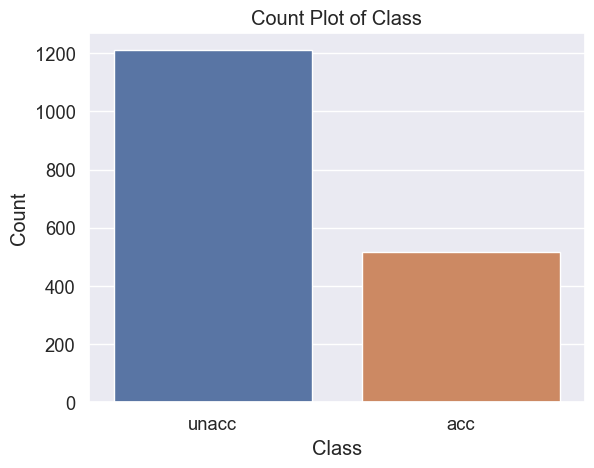

In [28]:
sns.countplot(x='class', data=df)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count Plot of Class')
plt.show()


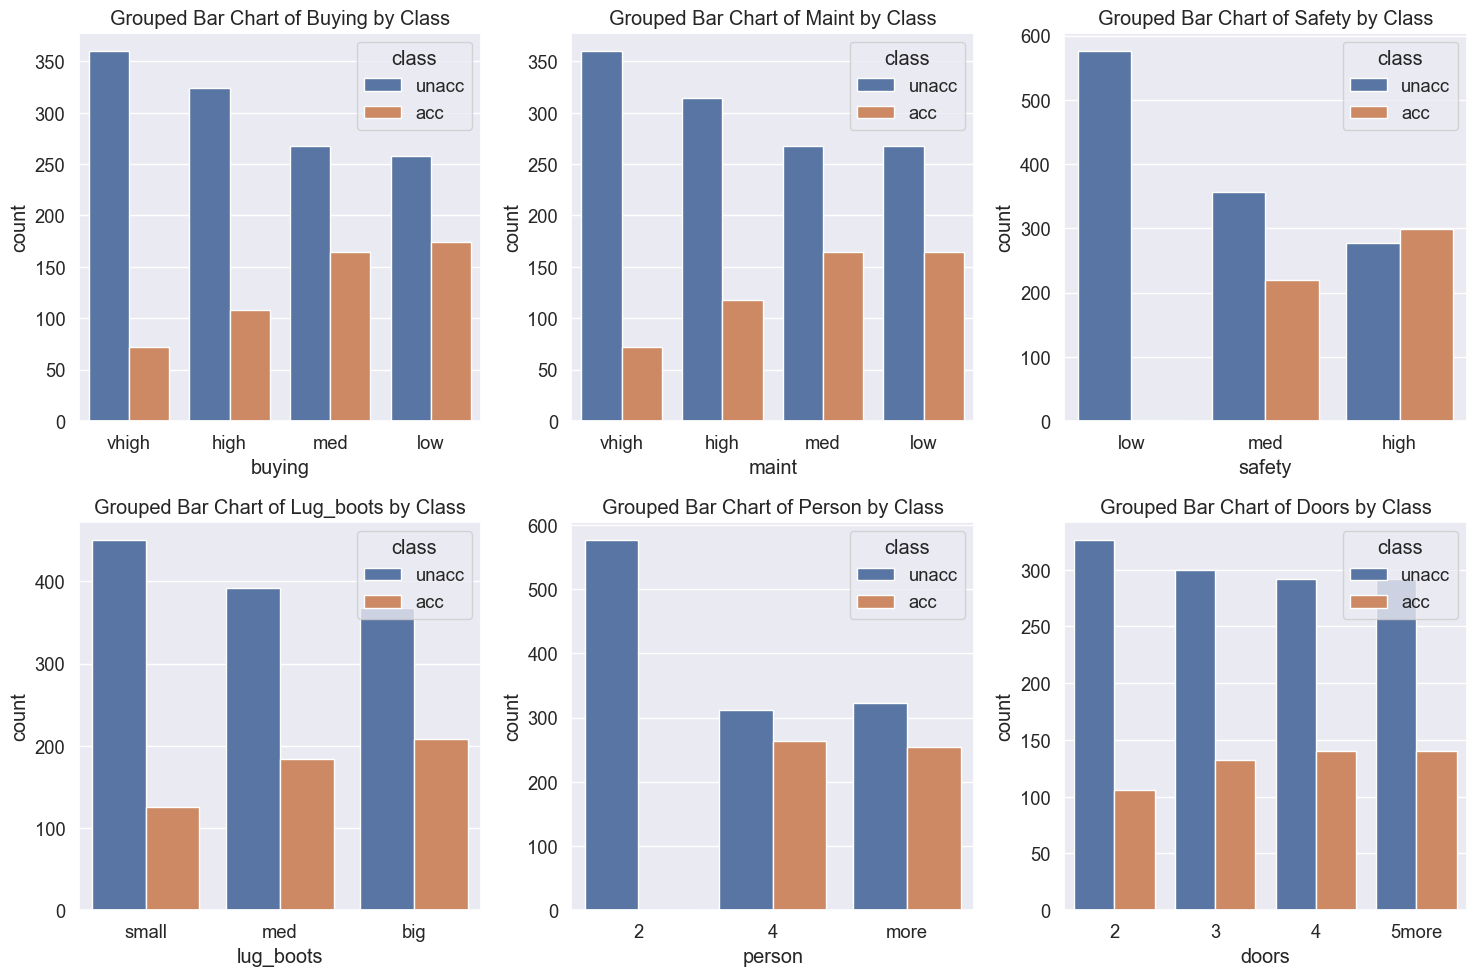

In [29]:
features = ['buying', 'maint', 'safety', 'lug_boots', 'person', 'doors']
fig, axes = plt.subplots(2, 3, figsize=(15, 10)) 
for feature, ax in zip(features, axes.flatten()):
    sns.countplot(data=df, x=feature, hue='class', dodge=True, ax=ax)
    ax.set_title(f'Grouped Bar Chart of {feature.capitalize()} by Class')
plt.tight_layout()
plt.show()

In [30]:
df.columns

Index(['buying', 'maint', 'doors', 'person', 'lug_boots', 'safety', 'class'], dtype='object')

In [32]:
df['buying'] = pd.Categorical(df['buying']).codes
df['maint'] = pd.Categorical(df['maint']).codes
correlation_matrix = df[['buying', 'maint']].corr()
correlation_matrix

,buying,maint
buying,1.000000e+00,-3.436808e-16
maint,-3.436808e-16,1.000000e+00


<Axes: >

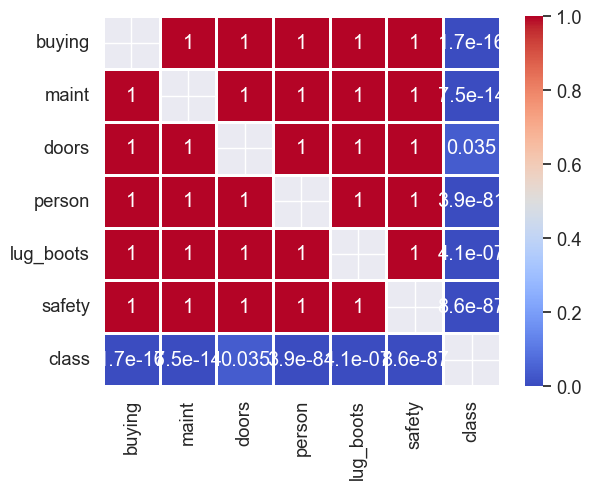

In [39]:
from scipy.stats import chi2_contingency
def chi_squared_test(column1, column2):
    contingency_table = pd.crosstab(df[column1], df[column2])
    _, p, _, _ = chi2_contingency(contingency_table)
    return p

# Create a matrix of p-values for each pair of columns
columns = df.columns
p_values = pd.DataFrame(index=columns, columns=columns)
for col1 in columns:
    for col2 in columns:
        if col1 != col2:
            p_values.loc[col1, col2] = chi_squared_test(col1, col2)

# Convert p-values to numeric format
p_values = p_values.apply(pd.to_numeric, errors='coerce')

# Create a heatmap
sns.heatmap(p_values, annot=True, cmap='coolwarm', linewidths=2)

In [12]:
input_features = df[['doors', 'person', 'lug_boots', 'safety', 'buying' , 'maint']]
output_target = df['class']

In [13]:
encoder = LabelEncoder()

In [15]:
encoded_feature = input_features.apply(encoder.fit_transform)
encoded_feature.head(15)

,doors,person,lug_boots,safety,buying,maint
0,0,0,2,1,3,3
1,0,0,2,2,3,3
2,0,0,2,0,3,3
3,0,0,1,1,3,3
4,0,0,1,2,3,3
5,0,0,1,0,3,3
6,0,0,0,1,3,3
7,0,0,0,2,3,3
8,0,0,0,0,3,3
9,0,1,2,1,3,3


In [19]:
df[['buying','maint']].corr()

C:\Users\ziadg\AppData\Local\Temp\ipykernel_4304\3305691056.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[['buying','maint']].corr()


""


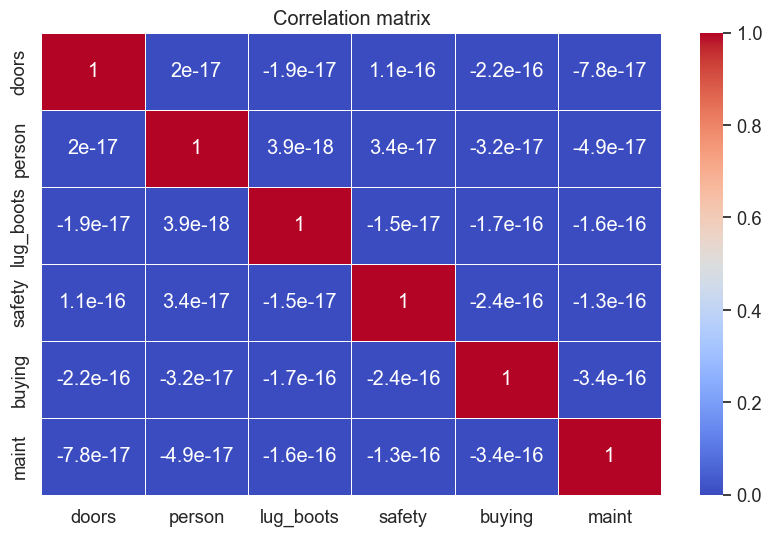

In [16]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2)
sns.heatmap(encoded_feature.corr(),annot=True, cmap='coolwarm',linewidth=0.5)
plt.title('Correlation matrix');


In [17]:
encoded_feature.describe().T

,count,mean,std,min,25%,50%,75%,max
doors,1728.0,1.5,1.118358,0.0,0.75,1.5,2.25,3.0
person,1728.0,1.0,0.816733,0.0,0.00,1.0,2.00,2.0
lug_boots,1728.0,1.0,0.816733,0.0,0.00,1.0,2.00,2.0
safety,1728.0,1.0,0.816733,0.0,0.00,1.0,2.00,2.0
buying_maint_cost,1728.0,7.5,4.611107,0.0,3.75,7.5,11.25,15.0


In [18]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(encoded_feature)
scaled_features

array([[0.        , 0.        , 1.        , 0.5       , 1.        ],
       [0.        , 0.        , 1.        , 1.        , 1.        ],
       [0.        , 0.        , 1.        , 0.        , 1.        ],
       ...,
       [1.        , 1.        , 0.        , 0.5       , 0.33333333],
       [1.        , 1.        , 0.        , 1.        , 0.33333333],
       [1.        , 1.        , 0.        , 0.        , 0.33333333]])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, output_target, test_size=0.3, random_state=30)

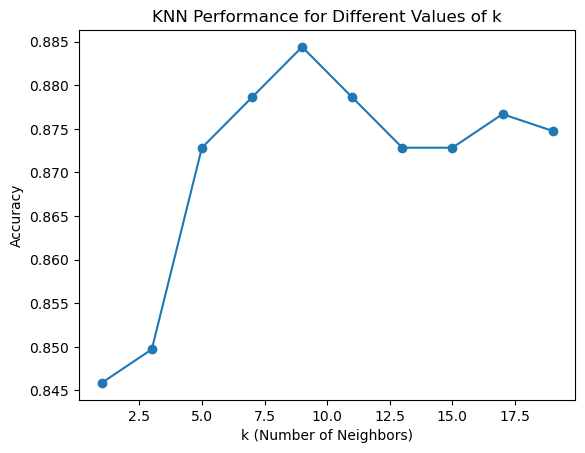

In [20]:
k_values = np.arange(1, 21, 2) 
accuracy_values = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
plt.plot(k_values, accuracy_values, marker='o')
plt.title('KNN Performance for Different Values of k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.show()

In [21]:
model_1 = KNeighborsClassifier(n_neighbors=9)
model_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [22]:
predictions_1 = model_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, predictions_1)
print(f"Accuracy: {accuracy_1:.4f}")
print("Classification Report:\n", classification_report(y_test, predictions_1))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions_1))

Accuracy: 0.8844
Classification Report:
               precision    recall  f1-score   support

         acc       0.74      0.92      0.82       151
       unacc       0.96      0.87      0.91       368

    accuracy                           0.88       519
   macro avg       0.85      0.90      0.87       519
weighted avg       0.90      0.88      0.89       519

Confusion Matrix:
 [[139  12]
 [ 48 320]]


In [23]:
model_2= GaussianNB()
model_2.fit(X_train, y_train)

GaussianNB()

In [24]:
predictions_2 = model_2.predict(X_test)
accuracy_2 = accuracy_score(y_test, predictions_2)
print(f"Naive Bayes Accuracy: {accuracy_2:.4f}")
print("Naive Bayes Classification Report:\n", classification_report(y_test, predictions_2))
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, predictions_2))

Naive Bayes Accuracy: 0.7572
Naive Bayes Classification Report:
               precision    recall  f1-score   support

         acc       0.60      0.48      0.54       151
       unacc       0.80      0.87      0.84       368

    accuracy                           0.76       519
   macro avg       0.70      0.68      0.69       519
weighted avg       0.75      0.76      0.75       519

Naive Bayes Confusion Matrix:
 [[ 73  78]
 [ 48 320]]


In [25]:
model_3 = RandomForestClassifier(random_state=0)
model_3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [26]:
predictions_3 = model_3.predict(X_test)
accuracy_3 = accuracy_score(y_test, predictions_3)
print(f"Random Forest Accuracy: {accuracy_3:.4f}")
print("Random Forest Classification Report:\n", classification_report(y_test, predictions_3))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, predictions_3))

Random Forest Accuracy: 0.9364
Random Forest Classification Report:
               precision    recall  f1-score   support

         acc       0.85      0.95      0.90       151
       unacc       0.98      0.93      0.95       368

    accuracy                           0.94       519
   macro avg       0.91      0.94      0.93       519
weighted avg       0.94      0.94      0.94       519

Random Forest Confusion Matrix:
 [[143   8]
 [ 25 343]]


In [27]:
model_4 = LogisticRegression()
model_4.fit(X_train, y_train)

LogisticRegression()

In [28]:
predictions_4 = model_4.predict(X_test)
accuracy = accuracy_score(y_test, predictions_4)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, predictions_4))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions_4))

Accuracy: 0.7071
Classification Report:
               precision    recall  f1-score   support

         acc       0.50      0.37      0.42       151
       unacc       0.77      0.85      0.80       368

    accuracy                           0.71       519
   macro avg       0.63      0.61      0.61       519
weighted avg       0.69      0.71      0.69       519

Confusion Matrix:
 [[ 56  95]
 [ 57 311]]
